In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

I've used a Kaggle DataSet from: https://www.kaggle.com/competitions/titanic/submissions
#### My job is to prepare a model predicting if a passenger would survive a Titanic.

In [298]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

### I've Started with a Data Exploration

In [299]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Here I've created a Variable indicating in which part of a ship the cabin is located

In [300]:
cabin_letter = train_df["Cabin"].dropna().transform(lambda x: x[0])
cabin_letter1 = test_df["Cabin"].dropna().transform(lambda x: x[0])
train_df["Cabin Letter"] = cabin_letter
test_df["Cabin Letter"] = cabin_letter1

In [301]:
train_df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN


In [302]:
result1 = train_df.groupby("Cabin Letter").sum()

([<matplotlib.axis.XTick at 0x2b1072056d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

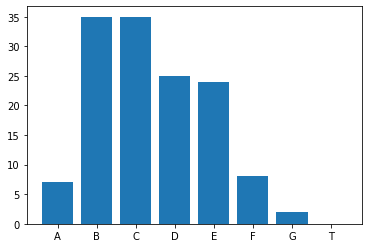

In [303]:
plt.bar(result1.index, result1["Survived"])
plt.xticks(result1.index)


<AxesSubplot:xlabel='Cabin Letter'>

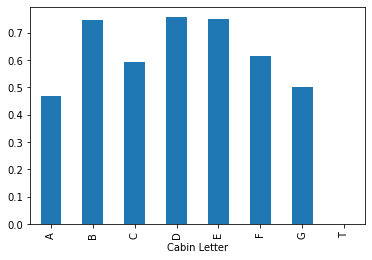

In [304]:
(result1["Survived"]/train_df.groupby("Cabin Letter").count()["Survived"]).plot(kind="bar")

In [305]:
train_df["Survived"][train_df["Sex"] == "female"].describe()

count    314.000000
mean       0.742038
std        0.438211
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [306]:
train_df["Survived"][(train_df["Age"] < 18) & (train_df["Pclass"] == 1)].describe()

count    12.000000
mean      0.916667
std       0.288675
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Survived, dtype: float64

#### What have I Learned:
Children have higher chance to survive \
First class passengers have a higher chance to survive \
B, D, E Cabins were most Safe. \
Women have a higher chance of survival \

### Model Creation

#### First of All I prepare the train and test Data by filling the NaN values, I've used different methods for different Variables.

In [307]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [308]:
si_train = imp_mean.fit_transform(train_df[["Age", "Fare"]])
si_train_median = imp_median.fit_transform(train_df[["Pclass", "SibSp", "Parch"]])
si_train_freq = imp_freq.fit_transform(train_df[["Sex", "Embarked", "Cabin Letter"]])

si_test = imp_mean.fit_transform(test_df[["Age", "Fare"]])
si_test_median = imp_median.fit_transform(test_df[["Pclass", "SibSp", "Parch"]])
si_test_freq = imp_freq.fit_transform(test_df[["Sex", "Embarked", "Cabin Letter"]])

In [309]:
X = train_df
Z = test_df
X[["Pclass", "SibSp", "Parch"]] = si_train_median
X[["Sex", "Embarked", "Cabin Letter"]] = si_train_freq
X[["Age", "Fare"]] = si_train

Z[["Pclass", "SibSp", "Parch"]] = si_test_median
Z[["Sex", "Embarked", "Cabin Letter"]] = si_test_freq
Z[["Age", "Fare"]] = si_test

#### I've Recoded the "Sex" variable into Binary

In [310]:
sex_dict = {"male": 1, "female": 0}
train_df["Sex"] = train_df["Sex"].transform(lambda x: sex_dict[x])
test_df["Sex"] = test_df["Sex"].transform(lambda x: sex_dict[x])


#### I've got rid of unnecessary variables

In [311]:
X = X.loc[:, (X.columns != "Survived") 
             & (X.columns != "Name") 
             & (X.columns != "Ticket") 
             & (X.columns != "Cabin")]
Z = Z.loc[:, (Z.columns != "Survived") 
             & (Z.columns != "Name") 
             & (Z.columns != "Ticket") 
             & (Z.columns != "Cabin")]

#### I've used OneHot Encoding to encode Pclass, Cabin Letter, and Embarked variables into Binaries

In [312]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X[["Pclass", "Cabin Letter", "Embarked"]])

OneHotEncoder(handle_unknown='ignore')

In [313]:
enc.categories_
enc_val = pd.DataFrame(enc.transform(X[["Pclass", "Cabin Letter", "Embarked"]]).toarray())

In [314]:
X["First Class"] = enc_val[0]
X["Second Class"] = enc_val[1]
X["Third Class"] = enc_val[2]
X["Cab_isA"] = enc_val[3].values
X["Cab_isB"] = enc_val[4].values
X["Cab_isC"] = enc_val[5].values
X["Cab_isD"] = enc_val[6].values
X["Cab_isE"] = enc_val[7].values
X["Cab_isF"] = enc_val[8].values
X["Cab_isG"] = enc_val[9].values
X["Cab_isT"] = enc_val[10].values
X["Emb_atC"] = enc_val[11].values
X["Emb_atQ"] = enc_val[12].values
X["Emb_atS"] = enc_val[13].values

C:\Users\User\AppData\Local\Temp\ipykernel_21192\1648753296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["First Class"] = enc_val[0]
C:\Users\User\AppData\Local\Temp\ipykernel_21192\1648753296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Second Class"] = enc_val[1]
C:\Users\User\AppData\Local\Temp\ipykernel_21192\1648753296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [315]:
enc.fit(Z[["Pclass", "Cabin Letter", "Embarked"]])

OneHotEncoder(handle_unknown='ignore')

In [316]:
enc_val = pd.DataFrame(enc.transform(Z[["Pclass", "Cabin Letter", "Embarked"]]).toarray())

In [317]:
enc_val.shape

(418, 13)

In [318]:
Z["First Class"] = enc_val[0]
Z["Second Class"] = enc_val[1]
Z["Third Class"] = enc_val[2]
Z["Cab_isA"] = enc_val[3].values
Z["Cab_isB"] = enc_val[4].values
Z["Cab_isC"] = enc_val[5].values
Z["Cab_isD"] = enc_val[6].values
Z["Cab_isE"] = enc_val[7].values
Z["Cab_isF"] = enc_val[8].values
Z["Cab_isG"] = enc_val[9].values
Z["Cab_isT"] = 0
Z["Emb_atC"] = enc_val[10].values
Z["Emb_atQ"] = enc_val[11].values
Z["Emb_atS"] = enc_val[12].values

C:\Users\User\AppData\Local\Temp\ipykernel_21192\4210583141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z["First Class"] = enc_val[0]
C:\Users\User\AppData\Local\Temp\ipykernel_21192\4210583141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z["Second Class"] = enc_val[1]


In [319]:
X = X.loc[:, (X.columns != "Embarked") 
          & (X.columns != "Cabin Letter")
          & (X.columns != "Pclass")]

Z = Z.loc[:, (Z.columns != "Embarked") 
          & (Z.columns != "Cabin Letter")
          & (Z.columns != "Pclass")]

In [320]:
X.head(6)

,PassengerId,Sex,Age,SibSp,Parch,Fare,First Class,Second Class,Third Class,Cab_isA,Cab_isB,Cab_isC,Cab_isD,Cab_isE,Cab_isF,Cab_isG,Cab_isT,Emb_atC,Emb_atQ,Emb_atS
0,1,1,22.000000,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0,38.000000,1.0,0.0,71.2833,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,0,26.000000,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0,35.000000,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,1,35.000000,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6,1,29.699118,0.0,0.0,8.4583,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [321]:
Y = train_df["Survived"]

### I've Decided to use Decision Tree Classifier as my model
#### Leaf size = 18 was found to be most accurate

In [394]:
model1 = tree.DecisionTreeClassifier(min_samples_leaf=18)

In [395]:
model1.fit(X, Y)

DecisionTreeClassifier(min_samples_leaf=18)

In [396]:
prediction = model1.predict(Z)

In [397]:
Solution = pd.DataFrame([test_df["PassengerId"], prediction]).T
Solution.columns = ["PassengerId", "Survived"] 

In [398]:
Solution

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [399]:
Solution.to_csv("Solution5.csv")

### The Accuracy of my model turned out to be 0.78229, I've become top 20% in Titanic Competition

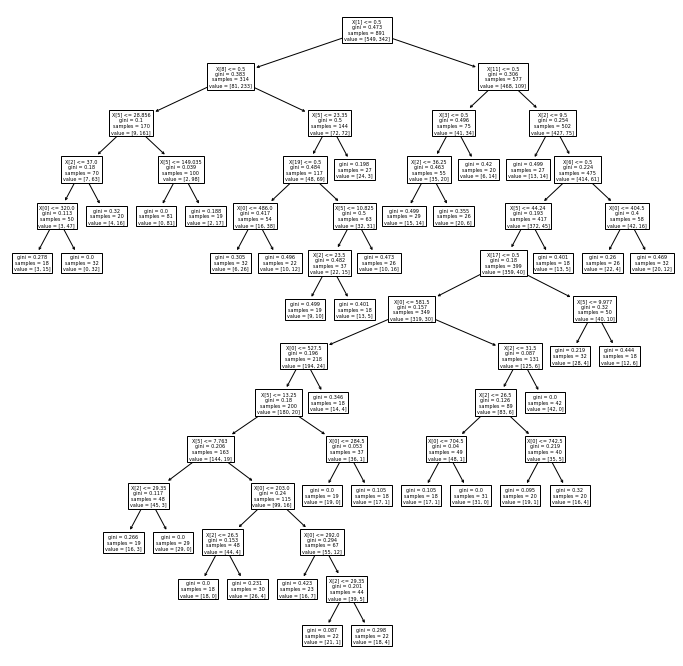

In [405]:
plt.figure(figsize=(12,12))
tree.plot_tree(model1)
plt.savefig('tree_high_dpi', dpi=100)